# Анализ успешности игр для интернет-магазина «Стримчик»

Этот проект исследует закономерности, определяющие успешность компьютерной игры. Проведенный анализ поможет создать маркетинговую стратегию для потенциально популярных продуктов.

**План исследования:**
1. Знакомимся с данными и готовим их к последующему анализу.
2. Исследовательский анализ:
* выбираем актуальный для наших целей период;
* находим перспективные платформы и жанры;
* определяем влияние оценок критиков/пользователей на продажи;
3. Анализируем региональные особенности.
4. Проверяем гипотезы.
5. Формулируем выводы, даем рекомендации.

## Знакомство с данными

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [ ]:
try:
    df = pd.read_csv('/datasets/games.csv')
    print("Данные успешно загружены")
    display(df.head())
    df.info()
    
except:
    print("Ошибка загрузки данных")

Данные успешно загружены


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Мы видим, что данные довольно полные, но есть проблемы с пропусками в последних 3-ех столбцах. Здесь нет данных почти в 50% строк. 

Также немного пропусков есть в столбцах "Name", "Year_of_Release", "Genre".

Отметим неподходящий формат данных в столбцах "User_Score" и "Year_of_Release". В первом случае object не подходит для работы с числовыми данными, поэтому требует изменения на float, а во втором - ситуация не критичная, но float лучше заменить на int, так привычнее для восприятия.

Кроме того, для удобства лучше привести названия столбцов к нижнему регистру.

## Подготовка данных

### Названия столбцов

In [ ]:
# приведем название столбцов к нижнему регистру
df_for_project = df.rename(columns={
    'Name': 'name', 
    'Platform': 'platform', 
    'Year_of_Release': 'year_of_release', 
    'Genre': 'genre',
    'NA_sales': 'na_sales', 
    'EU_sales': 'eu_sales', 
    'JP_sales': 'jp_sales', 
    'Other_sales': 'other_sales',
    'Critic_Score': 'critic_score', 
    'User_Score': 'user_score', 
    'Rating': 'rating'
})

display(df_for_project.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Типы данных

Меняем типы данных в столбцах "user_score" и "year_of_release". В первом случае object не подходит для работы с числовыми данными, а во втором - float лучше заменить на int, такой вид привычнее для восприятия.

In [ ]:
# для начала проверим, какие значения есть в столбце "user_score", чтобы случайно не удалить лишнее методом to_numeric
print(df_for_project['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Среди значений в столбце "user_score" есть 'tbd' (To Be Determined), что переводится как «подлежит определению». По факту это означает отсутствие значения, поэтому его мы заменим на 'nan'.

In [ ]:
# меняем типы данных
df_for_project['user_score'] = pd.to_numeric(df_for_project['user_score'],errors='coerce')
df_for_project['year_of_release'] = df_for_project['year_of_release'].astype('Int64')

df_for_project.info()
display(df_for_project.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Пропуски

Мы решили минимально пользоваться методом удаления для работы с пропусками, чтобы не потерять данные о продажах, важные в рамках этого исследования.

#### name, genre, rating

**Причины пропусков**

Пропуски в столбцах name, genre, скорее всего, связаны с технической ошибкой либо человеческим фактором при сборе данных.

Чтобы понять причину появления пропусков в столбце rating, построим график.

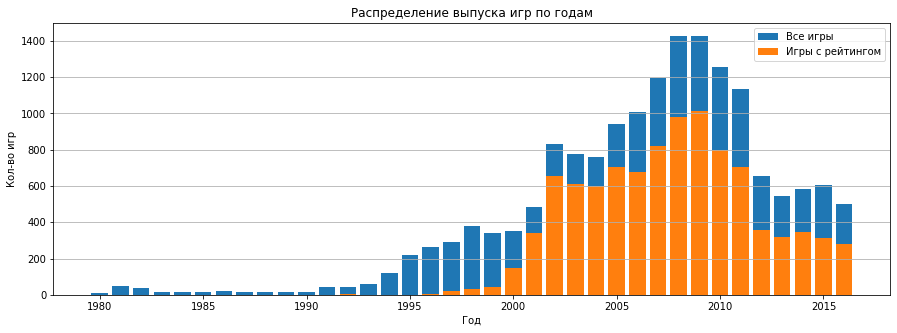

In [ ]:
year_of_release = df_for_project.query('year_of_release != "unknown"')
year_of_release = year_of_release['year_of_release'].value_counts()
rating = df_for_project.query('rating != "unknown"').groupby('year_of_release')['rating'].count()

plt.figure(figsize=(15, 5))
plt.bar(year_of_release.index, year_of_release.values, label='Все игры')
plt.bar(rating.index, rating.values, label='Игры с рейтингом')
plt.xlabel('Год')
plt.ylabel('Кол-во игр')
plt.title('Распределение выпуска игр по годам')
plt.legend()
plt.grid(axis='y')
plt.show()

Как видно по графику, рейтинг у игр массово появляется только начиная с 1996 года. Вероятно, пропуски в этом столбце связаны 1) частично с тем, что до этого времени рейтинги не проставлялись, 2) частично с тем, что не все игры могут отправлять на оценку.

In [ ]:
# посмотрим, какие значения рейтинга ESRB существуют
display(df_for_project['rating'].value_counts())

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Всего у рейтинга 9 вариантов значений, 4 из которых практически не встречаются. Их можно заменить на анологичные варианты из списка:
* ЕС (для детей младшего возраста) на Е,
* K-A (6+) на E, 
* RP (рейтинг ожидается) на значение nan, 
* AO (только для взрослых) на M.

In [ ]:
# заменим редкие значения
df_for_project['rating'] = df_for_project['rating'].replace('EC', 'E')
df_for_project['rating'] = df_for_project['rating'].replace('K-A', 'E')
df_for_project['rating'] = df_for_project['rating'].replace('AO', 'M')
df_for_project['rating'] = df_for_project['rating'].replace('RP', )

display(df_for_project['rating'].value_counts())

E       4002
T       2962
M       1564
E10+    1420
Name: rating, dtype: int64

**Удаление пропусков**

In [ ]:
# выведем срезы датафрейма, где пропущены значения в столбце 'name'
display(df_for_project[(df_for_project['name'].isna())])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуска всего 2, поэтому можно их безболезненно удалить.

In [ ]:
# удаляем строки с пропущенными значениями
df_for_project = df_for_project.dropna(subset=['name'])

In [ ]:
# заменяем пропуски в столбце 'rating' заглушкой 'unknown'
df_for_project['rating'] = df_for_project['rating'].fillna('unknown')

df_for_project.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


#### year_of_release, critic_score, user_score

**Причины пропусков**

Пропуски в столбцах critic_score и user_score вызваны тем, что оценка игры - дело необязательное, поэтому не все игры были оценены критиками или игроками. Скорее всего, оценки есть только у самых популярных из них.

Пропуски в year_of_release, скорее всего, связаны с технической ошибкой либо человеческим фактором при сборе данных.

**Удаление пропусков**

Данные в этих столбцах числовые, поэтому для них не подойдет тот же метод, что и для object. Для этого типа данных подойдет числовая заглушка, например, -1. Это число, которое не используется ни в одном из этих столбцов.

In [ ]:
# удостоверимся, что -1 не используется в столбцах
display('Значения из столбца critic_score', df_for_project['critic_score'].sort_values().unique())
display('Значения из столбца user_score', df_for_project['user_score'].sort_values().unique())
display('Значения из столбца year_of_release', df_for_project['year_of_release'].sort_values().unique())

'Значения из столбца critic_score'

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

'Значения из столбца user_score'

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

'Значения из столбца year_of_release'

<IntegerArray>
[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, <NA>]
Length: 38, dtype: Int64

In [ ]:
# заменяем пропуски в столбцах 'critic_score' и 'user_score' заглушкой
columns_to_replace = ['critic_score', 'year_of_release', 'user_score']

for column in columns_to_replace:
    df_for_project[column] = df_for_project[column].fillna(-1)

df_for_project.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


### Дубликаты

In [ ]:
# проверяем, есть ли в датафрейме явные дубликаты
print('Дубликатов', df_for_project.duplicated().sum())

Дубликатов 0


Явных дубликатов не обнаружено.

In [ ]:
# проверим, есль ли неявные дубликаты
df_for_project[df_for_project[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Можно считать вторую строку дубликатом первой, так как у них совпадает много параметров: название, платформа, год выхода, жанр, оценки критиков и пользователей. Во второй строке только как будто не записались данные о продажах, поэтому она не посчиталась как явный дубликат. Можем ее безболезненно удалить.

In [ ]:
df_for_project = df_for_project.drop(index=16230)
df_for_project.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16712 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     16712 non-null  float64
 9   user_score       16712 non-null  float64
 10  rating           16712 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


### Продажи по регионам

Для последующего анализа посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [ ]:
# добавляем столбец с суммарными продажами со всех регионов
df_for_project['sum_sales'] = df_for_project['na_sales'] + df_for_project['eu_sales'] + df_for_project['jp_sales'] + df_for_project['other_sales']
display(df_for_project.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38


### Выводы по итогам обработки данных

Что можем сказать о данных в датасетах, с которыми нам предстоит работать:

* данные в датасете довольно полные (особенно в той его части, которая касается продаж: для нас она одна из самых важных), однако содержит и пропуски (больше всего в столбцах critic_score, user_score, rating);
* явных дубликатов нет, есть один неявный.

Что сделали:

* заменили значение tbd на пропуски;
* удалили пропуски с помощью заглушек (использовали "unknown" для строк и "-1" для числовых данных);
* удалили неявный дубликат;
* привели столбцы "year_of_release" и "user_score" к правильному формату и более привычному виду;
* создали новый столбец "sum_sales" с суммарными продажами по всем регионам для последующего анализа данных.

## Исследовательский анализ данных

В этой части проекта мы узнаем:

1. Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
2. Как менялись продажи по платформам?
3. Какие платформы лидируют по продажам, растут или падают? 
4. Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?
5. Какие жанры самые прибыльные? Выделяются ли жанры с высокими и низкими продажами?

### Анализ по всем данным

#### Годы

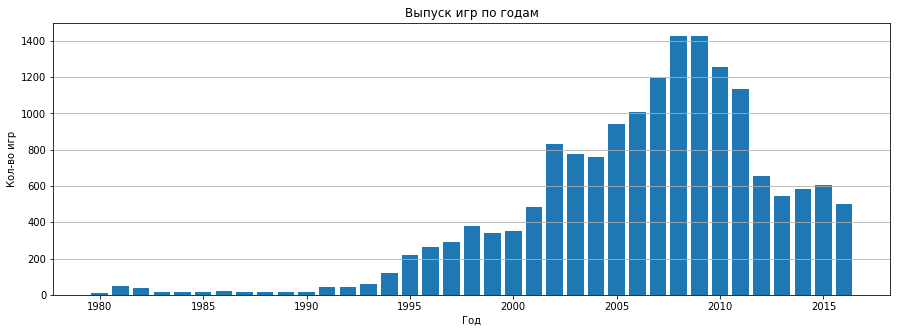

In [ ]:
# построим график, чтобы определить, как распределялся выпуск игр по годам
plt.figure(figsize=(15, 5))
plt.bar(year_of_release.index, year_of_release.values)
plt.xlabel('Год')
plt.ylabel('Кол-во игр')
plt.title('Выпуск игр по годам')
plt.grid(axis='y')
plt.show()

Видно, что игры в современном объеме (больше 400 в год) стали выпускать только начиная с 2001 года. Однако после резкого роста в 2007-2011 годах, в 2012 мы наблюдаем резкий спад активности по выпуску игр, который сохраняется вплоть до 2016 года. Возможно, это связано с усложнением и удорожанием разработки игр. 

#### Платформы

Найдем платформы с самыми высокими продажами.

In [ ]:
# группируем данные по платформам и суммируем выручку
platform = df_for_project.groupby('platform')['sum_sales'].sum().sort_values(ascending=False)

platform

platform
PS2     1255.77
X360     971.42
PS3      939.64
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: sum_sales, dtype: float64

Возьмем первые 10 платформ по продажам и построим распределение по годам.

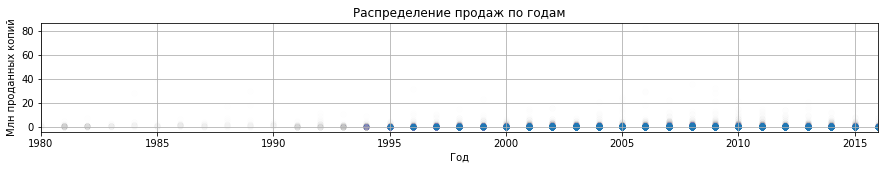

In [ ]:
# построим диаграмму рассеяния, чтобы выявить актуальный период
plt.figure(figsize=(15, 2))

plt.scatter(df_for_project['year_of_release'], df_for_project['sum_sales'], marker='o', alpha=0.005)
plt.xlabel('Год')
plt.ylabel('Млн проданных копий')
plt.title('Распределение продаж по годам')
plt.xlim(1980, 2016)
plt.grid()
plt.show()

По графику видно, что соотносимый с современным уровень продаж начинается с 1995 года. Возьмем данные по площадкам начиная с этого периода.

In [ ]:
# выбираем 10 платформ по прибыльности
gainful_platform = platform.head(10)
gainful_platform_index = gainful_platform.index

gainful_platform_df = df_for_project.query('platform in @gainful_platform_index & year_of_release > 1995')

gainful_platform_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


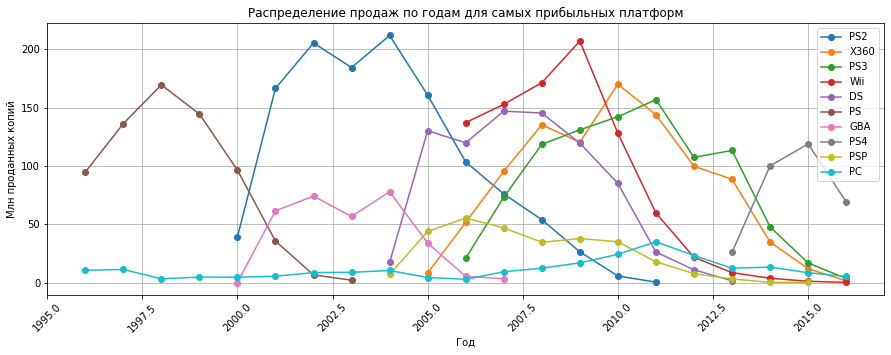

In [ ]:
# готовим данные для графика
ps2_platform_df = gainful_platform_df.query('platform == "PS2"')
x360_platform_df = gainful_platform_df.query('platform == "X360"')
ps3_platform_df = gainful_platform_df.query('platform == "PS3"')
wii_platform_df = gainful_platform_df.query('platform == "Wii"')
ds_platform_df = gainful_platform_df.query('platform == "DS"')
ps_platform_df = gainful_platform_df.query('platform == "PS"')
gba_platform_df = gainful_platform_df.query('platform == "GBA"')
ps4_platform_df = gainful_platform_df.query('platform == "PS4"')
psp_platform_df = gainful_platform_df.query('platform == "PSP"')
pc_platform_df = gainful_platform_df.query('platform == "PC"')


# строим график
plt.figure(figsize=(15, 5))
plt.plot(ps2_platform_df.groupby('year_of_release')['sum_sales'].sum(), marker='o', label='PS2')
plt.plot(x360_platform_df.groupby('year_of_release')['sum_sales'].sum(), marker='o', label='X360')
plt.plot(ps3_platform_df.groupby('year_of_release')['sum_sales'].sum(), marker='o', label='PS3')
plt.plot(wii_platform_df.groupby('year_of_release')['sum_sales'].sum(), marker='o', label='Wii')
plt.plot(ds_platform_df.groupby('year_of_release')['sum_sales'].sum(), marker='o', label='DS')
plt.plot(ps_platform_df.groupby('year_of_release')['sum_sales'].sum(), marker='o', label='PS')
plt.plot(gba_platform_df.groupby('year_of_release')['sum_sales'].sum(), marker='o', label='GBA')
plt.plot(ps4_platform_df.groupby('year_of_release')['sum_sales'].sum(), marker='o', label='PS4')
plt.plot(psp_platform_df.groupby('year_of_release')['sum_sales'].sum(), marker='o', label='PSP')
plt.plot(pc_platform_df.groupby('year_of_release')['sum_sales'].sum(), marker='o', label='PC')
plt.xlabel('Год')
plt.ylabel('Млн проданных копий')
plt.title('Распределение продаж по годам для самых прибыльных платформ')
plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.show()

Исходя из графика, мы видим, что пик активности самых прибыльных платформ уже прошел. Исходя из этого, для прогноза прибыльности нам лучше рассмотреть не такие успешные пока платформы, но с потенциалом для роста (как PS4).

In [ ]:
# определим срок жизни для каждой платформы

platform_life_data = []

for platform in gainful_platform_index:
    platform_data = gainful_platform_df[gainful_platform_df['platform'] == platform]
    max_year = platform_data['year_of_release'].max()
    min_year = platform_data['year_of_release'].min()
    platform_life = max_year - min_year
        
    platform_life_data.append({
            'platform': platform,
            'first_year': min_year,
            'last_year': max_year,
            'life': platform_life
        })

platform_life_df = pd.DataFrame(platform_life_data)
platform_life_df = platform_life_df.sort_values('life', ascending=False)

display(platform_life_df)
display('Медианная продолжительность жизни платформы', platform_life_df['life'].median().round(1))

,platform,first_year,last_year,life
9,PC,1996,2016,20
0,PS2,2000,2011,11
1,X360,2005,2016,11
8,PSP,2004,2015,11
2,PS3,2006,2016,10
3,Wii,2006,2016,10
4,DS,2004,2013,9
5,PS,1996,2003,7
6,GBA,2000,2007,7
7,PS4,2013,2016,3


'Медианная продолжительность жизни платформы'

10.0

Медианная продолжительность жизни успешной платформы - 10 лет.

Если рассмотреть платформу PS, то каждое новое поколение появляется примерно каждые 6 лет. При этом предыдущее поколение существует после появления нового еще примерно 3-5 лет.

### Анализ по актуальным данным

В предыдущем разделе мы узнали, что, судя по текущему состоянию индустрии (а именно активности выпуска игр), нам надо рассматривать период с 2012 по 2016 гг. Его и возьмем за основу для анализа в качестве **актуального**: в такой быстро меняющейся индустрии большой период брать не стоит, а пятилетнего интервала хватит, чтобы посмотреть на данные в динамике.

#### Перспективность платформ

In [ ]:
# создадим датафрейм за актуальный период
relevant_df_for_project = df_for_project.query('year_of_release >= 2012')

# создадим новый список с выручкой по платформам
relevant_platforms = relevant_df_for_project.groupby('platform')['sum_sales'].sum().sort_values(ascending=False)

relevant_df_for_project['year_of_release'].describe()
display(relevant_platforms)

platform
PS4     314.14
PS3     288.78
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: sum_sales, dtype: float64

In [ ]:
relevant_platforms_index = relevant_platforms.index
relevant_platform_df = relevant_df_for_project.query('platform in @relevant_platforms_index')
relevant_platform_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


Возьмем только те платформы, которые пока еще не закончили выпускать свои продукты.

In [ ]:
# определим срок жизни, год начала и конца выпуска игр для каждой платформы

platform_df_for_project = df_for_project.query('year_of_release > 0')
platform_life_data2 = []

for platform in relevant_platforms_index:
    relevant_platform_data = relevant_platform_df[relevant_platform_df['platform'] == platform]
    max_year = relevant_platform_data['year_of_release'].max()
    min_year = platform_df_for_project[platform_df_for_project['platform'] == platform]['year_of_release'].min()
    platform_life = max_year - min_year
        
    platform_life_data2.append({
            'platform': platform,
            'first_year': min_year,
            'last_year': max_year,
            'life': platform_life
        })

platform_life_df2 = pd.DataFrame(platform_life_data2)

# объединим нашу таблицу с данными о продажах
platform_life_df2 = platform_life_df2.merge(relevant_platforms, on='platform', how='left')
platform_life_df2 = platform_life_df2.sort_values('sum_sales', ascending=False)

# исключаем платформы, которые больше не выпускают игры и срок жизни которых уже составил 10 лет
relevant_platform_life_df2 = platform_life_df2.query('life < 10 & last_year == 2016')

display(relevant_platform_life_df2)

,platform,first_year,last_year,life,sum_sales
0,PS4,2013,2016,3,314.14
3,3DS,2011,2016,5,194.61
4,XOne,2013,2016,3,159.32
5,WiiU,2012,2016,4,82.19
7,PSV,2011,2016,5,49.18


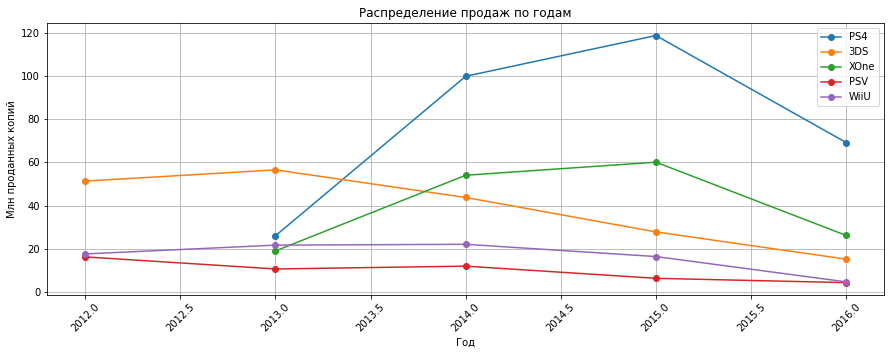

In [ ]:
# готовим данные для графика
ps4_platform_df = relevant_platform_df.query('platform == "PS4"')
ps3_platform_df = relevant_platform_df.query('platform == "PS3"')
x360_platform_df = relevant_platform_df.query('platform == "X360"')
ds3_platform_df = relevant_platform_df.query('platform == "3DS"')
xone_platform_df = relevant_platform_df.query('platform == "XOne"')
pc_platform_df = relevant_platform_df.query('platform == "PC"')
psv_platform_df = relevant_platform_df.query('platform == "PSV"')
wii_platform_df = relevant_platform_df.query('platform == "Wii"')
wiiu_platform_df = relevant_platform_df.query('platform == "WiiU"')

# строим график
plt.figure(figsize=(15, 5))
plt.plot(ps4_platform_df.groupby('year_of_release')['sum_sales'].sum(), marker='o', label='PS4')
plt.plot(ds3_platform_df.groupby('year_of_release')['sum_sales'].sum(), marker='o', label='3DS')
plt.plot(xone_platform_df.groupby('year_of_release')['sum_sales'].sum(), marker='o', label='XOne')
plt.plot(psv_platform_df.groupby('year_of_release')['sum_sales'].sum(), marker='o', label='PSV')
plt.plot(wiiu_platform_df.groupby('year_of_release')['sum_sales'].sum(), marker='o', label='WiiU')
plt.xlabel('Год')
plt.ylabel('Млн проданных копий')
plt.title('Распределение продаж по годам')
plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.show()

На графике мы видим, что продажи по всем платформам в 2016 году падают, по сравнению с 2015. Это может быть связано с глобальными тенденциями на рынке.

Самыми перспективными и с точки зрения возраста платформы, и с точки зрения ее прибыльности кажутся PS4 и XOne.

Построим "ящик с усами", чтобы лучше рассмотреть выбросы.

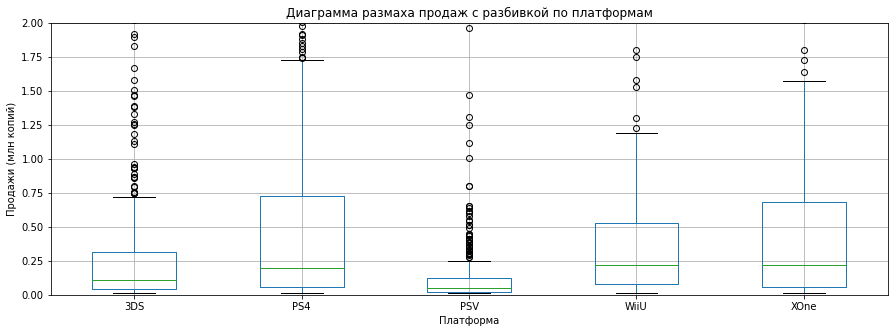

platform,3DS,PS4,PSV,WiiU,XOne
count,396.000000,392.000000,411.000000,147.000000,247.000000
mean,0.491439,0.801378,0.119659,0.559116,0.645020
std,1.387161,1.609456,0.203011,1.058836,1.036139
min,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.040000,0.060000,0.020000,0.080000,0.060000
50%,0.110000,0.200000,0.050000,0.220000,0.220000
75%,0.312500,0.730000,0.120000,0.525000,0.685000
max,14.600000,14.630000,1.960000,7.090000,7.390000


In [ ]:
# подготовим данные
promising_platforms_index = relevant_platform_life_df2['platform']
promising_platforms_df = relevant_df_for_project.query('platform in @promising_platforms_index')
data_for_boxplot = promising_platforms_df.pivot_table(index='name', columns='platform', values='sum_sales')

# построим график
data_for_boxplot.boxplot(labels=data_for_boxplot.columns, figsize=(15, 5))
plt.title('Диаграмма размаха продаж с разбивкой по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи (млн копий)')
plt.ylim(0, 2)
plt.grid(True)
plt.show()

data_for_boxplot.describe()

Видно, что медианные значения самые большие у игр XOne и WiiU, а самые маленькие - у PSV. При этом среднее самое большое у PS4 - это связано с тем, что единичные игры у платформы были сверхуспешными и принесли очень много продаж, чем исказили среднее значение. Также стоит отметить, что сверхуспешных игр было много и у 3DS, за счет этого платформа занимает 2-ое место по суммарной выручке после PS4, хотя медианное значение у него одно из самых низких, что говорит о нестабильности продаж. Платформа WiiU выпускает меньше всего игр, поэтому суммарная выручка у нее одна из самых низких при довольно высоких показалелях и медианы, и среднего.

Если делать **вывод о потенциале платформ**, то можно сказать, что:
* приоритетная платформа - PS4, так как имеет самую большую суммарную выручку за все годы существования, а также за последний год, у нее самые высокие максимальные показатели по выручке, а также довольно высокая медиана, что говорит о стабильности платформы;
* надежная платформа - XOne, так как имеет высокие показатели и медианы, и среднего, плюс неплохие высокие пиковые показатели, занимает 3-е место по выручке и суммарно, и за последний год; 
* рискованная, но интересная платформа - 3DS, потому что несмотря на большое количество хитов, у платформы много и провалов (низкое значение медианы), плюс на графике видно, что последние годы у 3DS наблюдается спад продаж.

#### Оценка критиков и продажи PS4

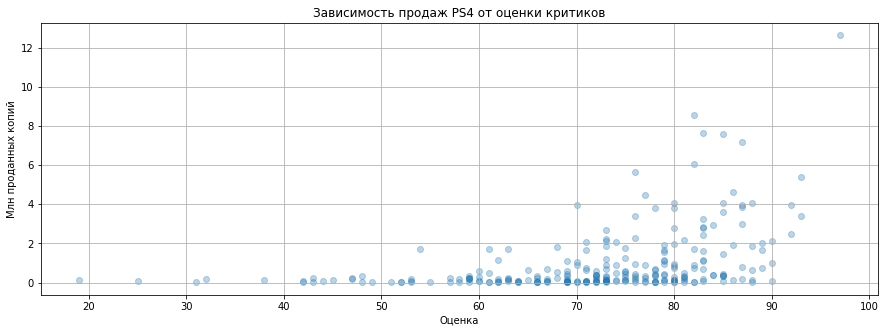

'Коэффициент Пирсона'

0.40589480145836687

In [ ]:
# создадим датафрейм для анализа
ps4_df = relevant_df_for_project.query('platform == "PS4" & critic_score > 0 & user_score > 0')

# построим диаграмму рассеяния для выявления зависимости продаж от оценок критиков
plt.figure(figsize=(15, 5))
plt.scatter(ps4_df['critic_score'], ps4_df['sum_sales'], marker='o', alpha=0.3)
plt.xlabel('Оценка')
plt.ylabel('Млн проданных копий')
plt.title('Зависимость продаж PS4 от оценки критиков')
plt.grid()
plt.show()

display('Коэффициент Пирсона', ps4_df['critic_score'].corr(ps4_df['sum_sales']))

На графиках видно, что некоторая зависимость между продажами PS4 и оценкой критиков есть, особенно она наблюдается на отрезке после оценки 70. О наличии зависимости между этими двумя показателями говорит и коэффицент корреляции Пирсона 0,41: есть прямая зависимость, но слабая. 

Получается, что большое количество продаж не всегда зависит от высокой оценки критиков.

#### Оценка пользователей и продажи PS4

Посмотрим, как влияют оценки пользователей на продажи внутри одной популярной платформы (PS4). 

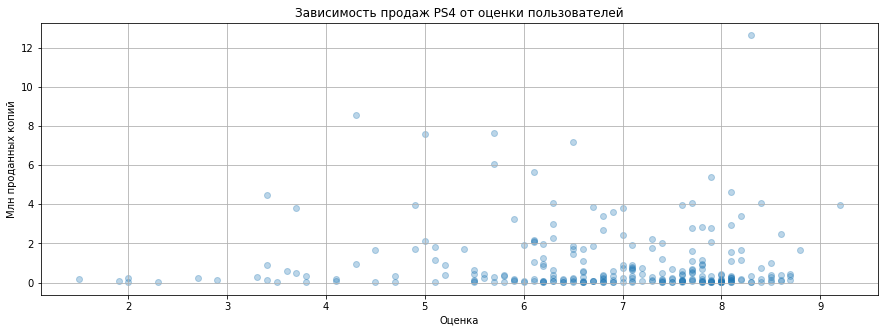

'Коэффициент Пирсона'

-0.03362497596528878

In [ ]:
# построим диаграмму рассеяния для выявления зависимости продаж от оценок пользователей
plt.figure(figsize=(15, 5))
plt.scatter(ps4_df['user_score'], ps4_df['sum_sales'], marker='o', alpha=0.3)
plt.xlabel('Оценка')
plt.ylabel('Млн проданных копий')
plt.title('Зависимость продаж PS4 от оценки пользователей')
plt.grid()
plt.show()

display('Коэффициент Пирсона', ps4_df['user_score'].corr(ps4_df['sum_sales']))

На графиках видно, что явной зависимости продаж от оценки пользователей нет. Коэффицент корреляции -0.03 тоже указывает на отсутствие зависимости.

#### Корреляции между оценками и продажами по всем остальным платформам

Посмотрим, как влияют **оценки критиков** на продажи.

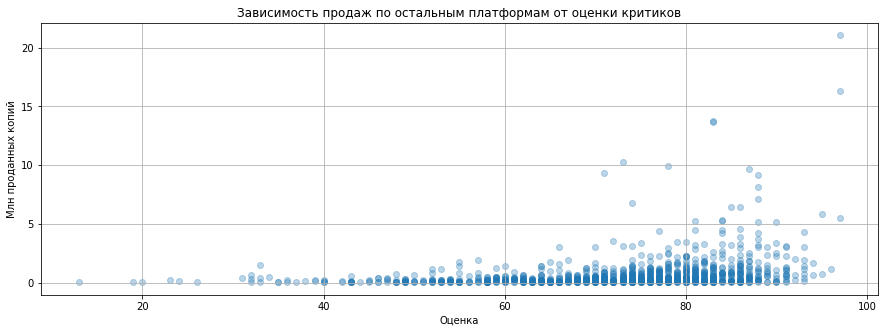

'Коэффициент Пирсона'

0.283328189181571

In [ ]:
# готовим данные
score_df = relevant_df_for_project.query('platform != "PS4" & critic_score > 0 & user_score > 0')

# построим диаграмму рассеяния для выявления зависимости продаж от оценок критиков
plt.figure(figsize=(15, 5))
plt.scatter(score_df['critic_score'], score_df['sum_sales'], marker='o', alpha=0.3)
plt.xlabel('Оценка')
plt.ylabel('Млн проданных копий')
plt.title('Зависимость продаж по остальным платформам от оценки критиков')
plt.grid()
plt.show()

display('Коэффициент Пирсона', score_df['critic_score'].corr(score_df['sum_sales']))

На графиках видно, что зависимость между продажами игр по всем платформам и оценкой критиков очень слабая. Об очень слабой прямой зависимости между этими двумя показателями говорит и коэффицент корреляции Пирсона 0.28.

Если сравнивать этот показатель у PS4 и остальных платформ, то можно сделать вывод о том, что у успешных платформ сильнее корреляция между оценкой критиков и продажами.

Теперь проверим, влияют ли **оценки пользователей** на продажи.

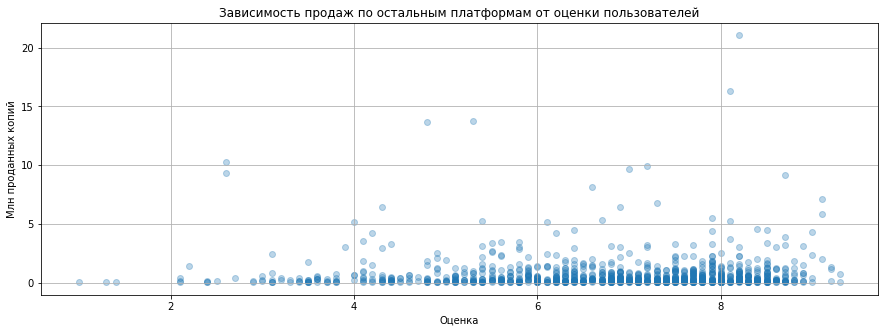

'Коэффициент Пирсона'

0.0093516986388548

In [ ]:
# построим диаграмму рассеяния для выявления зависимости продаж от оценок критиков
plt.figure(figsize=(15, 5))
plt.scatter(score_df['user_score'], score_df['sum_sales'], marker='o', alpha=0.3)
plt.xlabel('Оценка')
plt.ylabel('Млн проданных копий')
plt.title('Зависимость продаж по остальным платформам от оценки пользователей')
plt.grid()
plt.show()

display('Коэффициент Пирсона', score_df['user_score'].corr(score_df['sum_sales']))

На графике видно, что зависимости между продажами игр по всем платформам и оценкой пользователей нет. Об отсутствии зависимости между этими двумя показателями говорит и коэффицент корреляции Пирсона 0.01.

Здесь показатель корреляции похож на показатель корреляции по PS4 (-0.03): взаимосвязи между числом продаж и оценкой пользователей нет.

#### Распределение игр по жанрам

In [ ]:
genre_data = relevant_df_for_project.pivot_table(
    index='genre', 
    values=['sum_sales', 'name'], 
    aggfunc={'sum_sales': 'sum', 'name': 'count'}
)

genre_data.columns = ['game_number', 'sum_sales']

genre_data['mean_sales'] = relevant_df_for_project.groupby('genre')['sum_sales'].mean()

display(genre_data.sort_values(by='mean_sales'))

,game_number,sum_sales,mean_sales
genre,,,
Adventure,302,29.43,0.097450
Puzzle,28,4.89,0.174643
Strategy,71,13.34,0.187887
Fighting,109,44.49,0.408165
Action,1031,441.12,0.427856
Simulation,80,35.12,0.439000
Misc,192,85.04,0.442917
Racing,115,53.50,0.465217
Role-Playing,370,192.80,0.521081


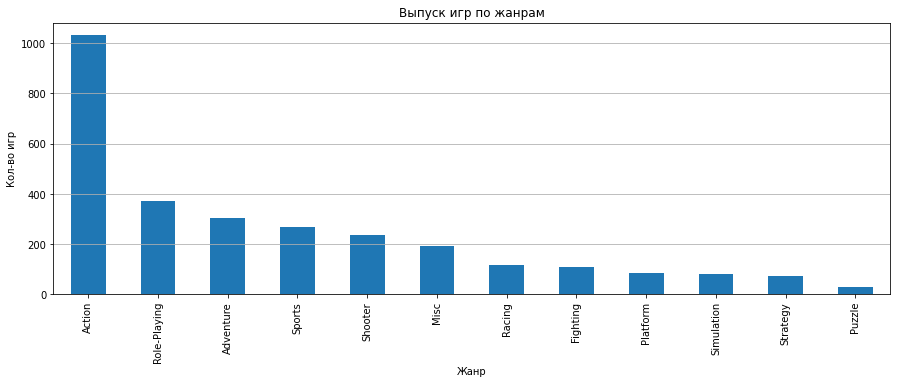

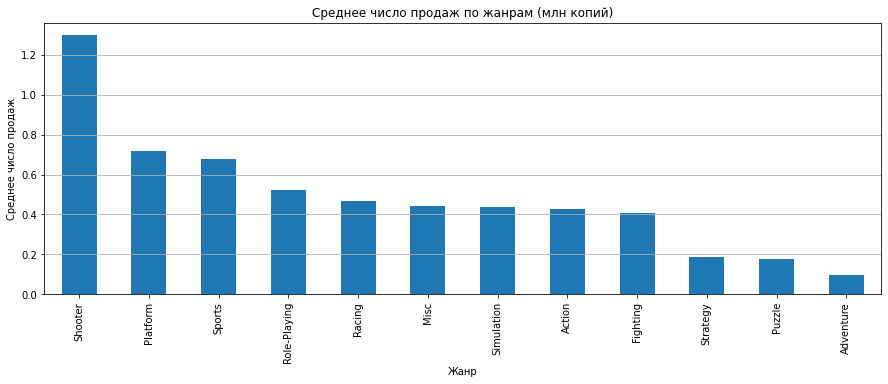

In [ ]:
# рассмотрим, в каких жанрах игры выпускают чаще всего
genre_data1 = genre_data.sort_values(by='game_number', ascending=False)

plt.figure(figsize=(15, 5))
genre_data1['game_number'].plot.bar()
plt.xlabel('Жанр')
plt.ylabel('Кол-во игр')
plt.title('Выпуск игр по жанрам')
plt.grid(axis='y')
plt.show()

# рассмотрим, в каких жанрах среднее число продаж одной игры выше всего
genre_data2 = genre_data.sort_values(by='mean_sales', ascending=False)

plt.figure(figsize=(15, 5))
genre_data2['mean_sales'].plot.bar()
plt.xlabel('Жанр')
plt.ylabel('Среднее число продаж')
plt.title('Среднее число продаж по жанрам (млн копий)')
plt.grid(axis='y')
plt.show()

Больше всего игр выпускается в жанре Action, Role-Playing и Adventure, меньше всего - в жанрах Simulation, Strategy и Puzzle. Выше всего среднее число продаж одной игры в жанрах Shooter, Platform и Sports, а ниже всего - в жанрах Adventure, Strategy и Puzzle. 

Если считать среднее по продажам показателем спроса, то логично, что игр в жанре Strategy и Puzzle выпускают так мало  - просто на них маленький спрос. Интересно, что в жанре Platform выпускают так мало игр, потому что спрос у них один из самых высоких (2-ое место в списке). Также обращают на себя внимание игры в жанре Shooter: по числу выпускаемых игр они находятся в середине списка, а вот по спросу - на первом месте. 

Странно, что игр в жанре Action выпускают так много (занимает 1-ое место), а вот спрос на эти игры не очень высокий (находится в середине списка, ближе к концу). В жанре Adventure тоже выпускают довольно много игр (3-е место), хотя спрос на них самый низкий из всего списка.

Подводя итог, можно сказать, что самыми **перспективными** для продвижения являются игры в жанрах Platform, Sports и Shooter, а игры в жанре Adventure и Action лучше пропустить, так как их и так на рынке довольно много, а продаж они приносят мало.

### Выводы по итогам анализа

За актуальный мы принимаем период с 2012 по 2016 гг. Предпосылки, на основе которых был выбран этот период:
* судя по активности выпуска игр, современное состояние индустрии сохраняется с 2012 по 2016 гг;
* индустрия меняется очень быстро, поэтому брать период больше не имеет смысла.

**Перспективность платформ**

В ходе анализа мы выявили, что для маркетингового продвижения:
* приоритетная платформа - PS4;
* надежная платформа - XOne;
* рискованная, но интересная платформа - 3DS. 

**Влияние оценки критиков и пользователей на продажи**

Взаимосвязи между числом продаж и оценкой пользователей нет - это показал и анализ популярной платформы (PS4), и общий анализ по всем платформам (коэффицент корреляции -0.03 и 0.01).

Влияние оценки кртитков на продажи больше заметно у PS4 (коэффицент корреляции 0.41), чем у остальных платформ (0.28). В первом случае мы наблюдаем слабую прямую зависимость, во втором - зависимости хоть и есть, но она еще слабее. 

**Влияние жанра**

* самые перспективные для продвижения - игры в жанрах Platform, Sports и Shooter; 
* игры в жанре Adventure и Action лучше пропустить.

## Региональные особенности

### Платформы

Выделим самые популярные платформы (топ-5) в Северной Америке, Европе, Японии и остальных регионах.

In [ ]:
# создаем сводную таблицу
na_top_platforms = relevant_df_for_project.pivot_table(index='platform', values='na_sales', aggfunc='sum')
eu_top_platforms = relevant_df_for_project.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
jp_top_platforms = relevant_df_for_project.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
other_top_platforms = relevant_df_for_project.pivot_table(index='platform', values='other_sales', aggfunc='sum')

na_sum_sale = na_top_platforms['na_sales'].sum()
eu_sum_sale = eu_top_platforms['eu_sales'].sum()
jp_sum_sale = jp_top_platforms['jp_sales'].sum()
other_sum_sale = other_top_platforms['other_sales'].sum()

# добавляем столбец с долями продаж по каждой платформе
na_top_platforms['ratio'] = (na_top_platforms['na_sales'] / na_sum_sale * 100).round(2).astype(str) + '%'
eu_top_platforms['ratio'] = (eu_top_platforms['eu_sales'] / eu_sum_sale * 100).round(2).astype(str) + '%'
jp_top_platforms['ratio'] = (jp_top_platforms['jp_sales'] / jp_sum_sale * 100).round(2).astype(str) + '%'
other_top_platforms['ratio'] = (other_top_platforms['other_sales'] / other_sum_sale * 100).round(2).astype(str) + '%'

display(na_top_platforms.sort_values(by='na_sales', ascending=False).head(5))
display(eu_top_platforms.sort_values(by='eu_sales', ascending=False).head(5))
display(jp_top_platforms.sort_values(by='jp_sales', ascending=False).head(5))
display(other_top_platforms.sort_values(by='other_sales', ascending=False).head(5))

,na_sales,ratio
platform,,
X360,140.05,23.7%
PS4,108.74,18.4%
PS3,103.38,17.49%
XOne,93.12,15.76%
3DS,55.31,9.36%


,eu_sales,ratio
platform,,
PS4,141.09,27.84%
PS3,106.85,21.08%
X360,74.52,14.7%
XOne,51.59,10.18%
3DS,42.64,8.41%


,jp_sales,ratio
platform,,
3DS,87.79,45.59%
PS3,35.29,18.32%
PSV,21.04,10.93%
PS4,15.96,8.29%
WiiU,13.01,6.76%


,other_sales,ratio
platform,,
PS4,48.35,30.96%
PS3,43.26,27.7%
X360,20.40,13.06%
XOne,14.27,9.14%
3DS,8.87,5.68%


Топ-3 популярных платформ в большей части регионов (Северная Америка, Европа и Остальные) - это X360, PS4 и PS3. Однако в Японии X360 вообще не нашла признания, а PS4 занимает лишь 4-ое место. Здесь наибольшую популярность приобрела платформа 3DS (46% всех продаж), а 3-е место занимает PSV, которая не вошла в топ-5 ни одного региона, кроме Японии.

### Жанры

Определим самые популярные жанры (топ-5) в каждом регионе.

In [ ]:
# создаем сводную таблицу
na_top_genres = relevant_df_for_project.pivot_table(index='genre', values='na_sales', aggfunc='sum')
eu_top_genres = relevant_df_for_project.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
jp_top_genres = relevant_df_for_project.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
other_top_genres = relevant_df_for_project.pivot_table(index='genre', values='other_sales', aggfunc='sum')

display(na_top_genres.sort_values(by='na_sales', ascending=False).head(5))
display(eu_top_genres.sort_values(by='eu_sales', ascending=False).head(5))
display(jp_top_genres.sort_values(by='jp_sales', ascending=False).head(5))
display(other_top_genres.sort_values(by='other_sales', ascending=False).head(5))

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.08
Role-Playing,48.53
Racing,27.29


,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


,other_sales
genre,
Action,51.14
Shooter,37.26
Sports,22.44
Role-Playing,14.83
Misc,7.67


В большей части регионов топ-3 жанра - это Action, Sports, Shooter, однако Япония опять выделяется в своих предпочтениях: тут на 1-ом месте Role-Playing.

### Рейтинг ESRB и продажи

Здесь мы рассмотрим влияние рейтинга от организации ESRB на продажи. Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию: 

* E (для всех); 
* EC (дети младшего возраста); 
* E10+ (старше 10);
* T (подростки); 
* M (старше 17);
* RP (рейтинг ожидается).

Построим график продаж в зависимости от рейтинга ESRB для каждого региона.

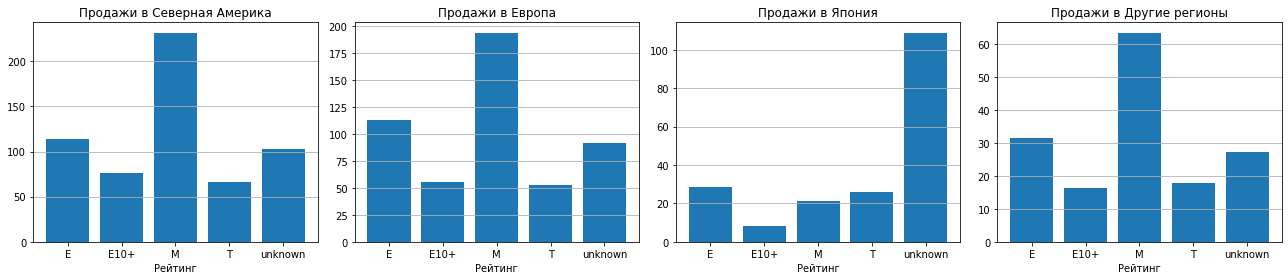

In [ ]:
# строим графики
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
titles = ['Северная Америка', 'Европа', 'Япония', 'Другие регионы']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 4))

for ax, region, title in zip(axes, regions, titles):
    sales = relevant_df_for_project.groupby('rating')[region].sum()
    ax.bar(sales.index, sales.values)
    ax.set_xlabel('Рейтинг')
    ax.set_title(f'Продажи в {title}')
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

Больше всего продаж во всех регионах у игр с рейтингом М, однако в Японии мы наблюдаем другую тенденцию: продажи игр с категорией M не так популярны и уступают играм категории E. Это говорит о некоторых особенностях японского общества: возможно, в нем менее приемлемы открытое использование мата, проявление насилия и жестокости - всё это отличительные особенности игр категории M.

Также обращает на себя внимание большое количество продаж у игр без категории (мы пометили ее как unknown). Возможно, система оценки игр по возрастной категории ESRB не распространена в Японии.

### Выводы о пользователях из разных регионах

Мы провели анализ 1) платформ, 2) игровых жанров и 2) зависимости продаж от возрастного рейтинга по регионам. На его основе мы можем сделать вывод о том, что Япония очень сильно отличается в предпочтениях и поведении пользователей от других регионов. Эту страну при следующем анализе, возможно, стоит рассматривать отдельно и не включать ее в общую статистику.

## Проверка гипотез

### Гипотеза №1

Проверяем, можно ли сказать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые: 
* нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны;
* альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC не равны.

Используем двустороннюю гипотезу, так как нам не подходит  ни вариант, при котором одно из значений больше, ни вариант, при котором одно из значений меньше.

In [ ]:
from scipy import stats as st

sample_1 = relevant_df_for_project.query('platform == "XOne" & user_score != -1')['user_score']
sample_2 = relevant_df_for_project.query('platform == "PC" & user_score != -1')['user_score']

alpha = 0.01

results_platform_score = st.ttest_ind(sample_1, sample_2)

print('p-значение:', results_platform_score.pvalue)

if results_platform_score.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу') 
    

p-значение: 0.5535080500643661
Нет оснований отвергнуть нулевую гипотезу


In [ ]:
# проверяем результат t-теста
print('Средний пользовательский рейтинг Xbox One', sample_1.mean().round(2))
print('Средний пользовательский рейтинг PC', sample_2.mean().round(2))

Средний пользовательский рейтинг Xbox One 6.52
Средний пользовательский рейтинг PC 6.43


Статистический тест показал, что средние пользовательские рейтинги платформ Xbox One и PC равны (в нашем случае очень близки).

### Гипотеза №2

Проверяем, можно ли сказать, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные:
* нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны;
* альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports не равны.

Используем двустороннюю гипотезу, так как нам все равно, они не равны в бОльшую сторону или в меньшую сторону.

In [ ]:
sample_3 = relevant_df_for_project.query('genre == "Action"  & user_score != -1')['user_score']
sample_4 = relevant_df_for_project.query('genre == "Sports"  & user_score != -1')['user_score']

alpha = 0.05

results_genre_score = st.ttest_ind(sample_3, sample_4)

print('p-значение:', results_genre_score.pvalue)

if results_genre_score.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу') 

p-значение: 4.8045233804629176e-26
Отвергаем нулевую гипотезу


In [ ]:
# проверяем результат t-теста
print('Средний пользовательский рейтинг Action', sample_3.mean().round(2))
print('Средний пользовательский рейтинг Sports', sample_4.mean().round(2))

Средний пользовательский рейтинг Action 6.83
Средний пользовательский рейтинг Sports 5.46


Статистический тест показал, что средние пользовательские рейтинги жанров Action и Sports разные.

## Итоговые выводы исследования

**1. Актуальный период данных**
Для анализа был выбран период с 2012 по 2016 год, так как это соответствует современному состоянию игровой индустрии (активность выпуска игр с 2012 по 2016 год).

**2. Перспективные платформы**

PS4 — приоритетная платформа с высокой суммарной выручкой, стабильными продажами и потенциалом для роста.

XOne — надежная платформа с высокими медианными и средними показателями продаж.

3DS — рискованная, но интересная платформа с большим количеством хитов, но нестабильными продажами.

**3. Влияние оценок на продажи**

Оценки критиков: слабая прямая зависимость (коэффициент корреляции 0.41 для PS4, 0.28 для других платформ). Высокие оценки критиков могут способствовать увеличению продаж, но не гарантируют успех.

Оценки пользователей: корреляция отсутствует (коэффициенты -0.03 для PS4 и 0.01 для других платформ). Пользовательские оценки не оказывают влияния на продажи.

**4. Популярные жанры**

Перспективные жанры: Platform, Sports и Shooter — высокий спрос и хорошие средние продажи.

Неперспективные жанры: Adventure и Action — низкий спрос при большом количестве выпускаемых игр.

**5. Региональные особенности**

Северная Америка, Европа, другие регионы: популярны платформы X360, PS4, PS3 и жанры Action, Sports, Shooter.

Япония: выделяется предпочтением платформ PSV и 3DS, а также жанра Role-Playing. 

Рекомендуем рассматривать Японию отдельно, так как поведение пользователей здесь сильно отличается от пользователей из других регионов.

**6. Проверка гипотез**

Гипотеза №1: средние пользовательские рейтинги платформ Xbox One и PC равны (p-значение < 0.01).

Гипотеза №2: средние пользовательские рейтинги жанров Action и Sports не равны (p-значение < 0.01).

**Рекомендации**

При планировании стратеги продвижения новых игр советуем:

1. Сфокусироваться на PS4 и XOne — наиболее перспективных и надежных платформах.

2. Уделить внимание играм в жанрах Platform, Sports и Shooter, так как они сочетают высокий спрос и хорошие продажи.

3. Учитывать различия в предпочтениях пользователей, особенно в Японии, где популярны другие платформы и жанры.

4. Ориентироваться на высокие оценки критиков как один из инструментов, но не переоценивать их влияние на продажи.